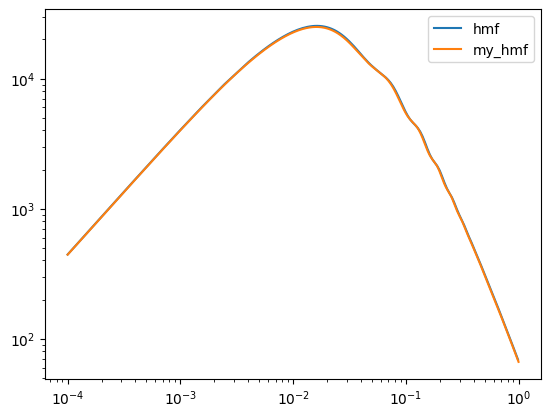

0.8085216540533029


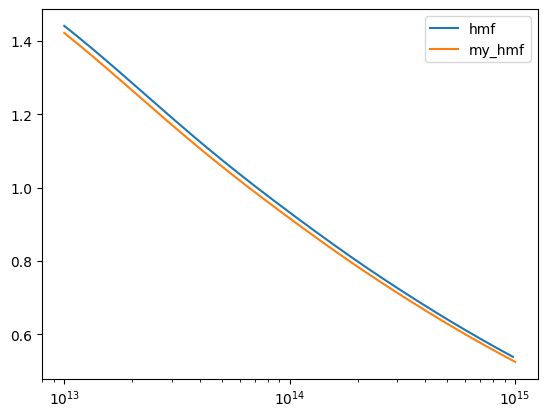

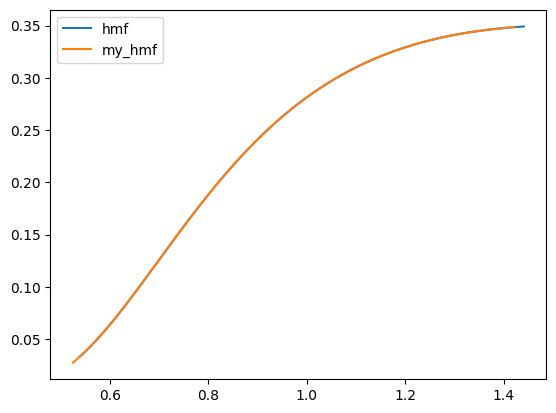

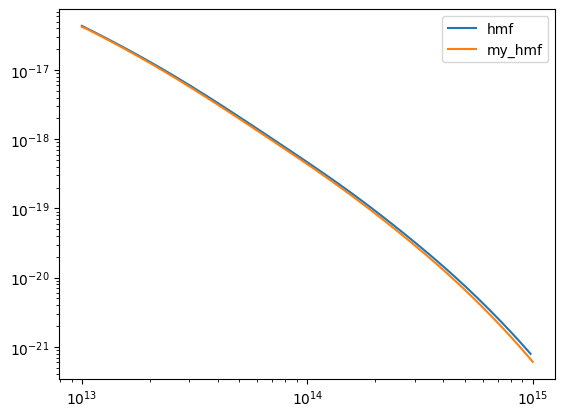

In [1]:
from my_hmf import My_Tinker08
import numpy as np
import matplotlib.pyplot as plt
from hmf import MassFunction

In [13]:
cosmo_params = {
    "H0": 70,
    "Om0": 0.294,
    "Ob0": 0.022 / 0.7**2,
}

n = 0.965

z = 1

In [17]:
mf = MassFunction(
    hmf_model="Tinker08",
    transfer_model="CAMB",
    cosmo_params=cosmo_params,
    Mmin=13,
    lnk_min=np.log(1e-4),
    lnk_max=np.log(1),
    z=z,
)
my_mf = My_Tinker08(z=z, cosmo_params=cosmo_params)

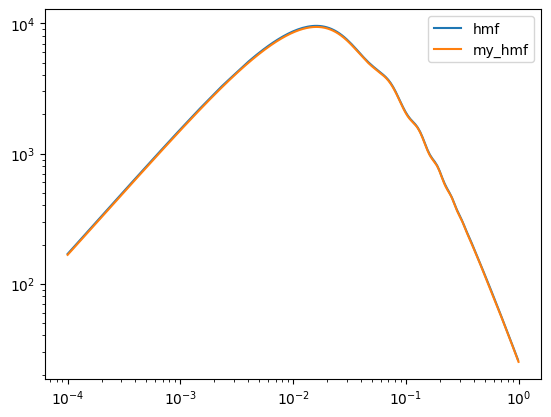

In [18]:
## Test P(k)
plt.xscale("log")
plt.yscale("log")
plt.plot(mf.k, mf.power, label="hmf")
plt.plot(my_mf.k, my_mf.Pk, label="my_hmf")
plt.legend()
plt.show()

0.496602000595208


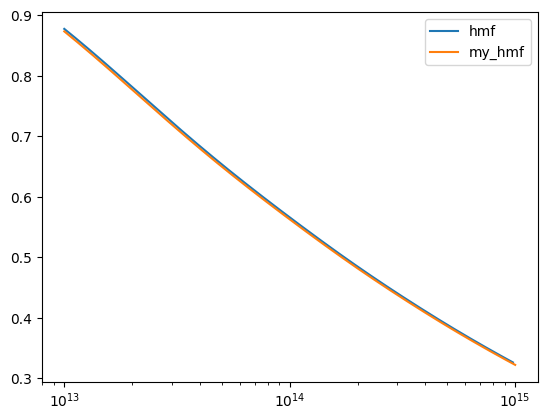

In [19]:
## Test sigma
print(my_mf.sigma_8)
plt.plot(mf.m, mf.sigma, label="hmf")
plt.plot(my_mf.m, my_mf.sigma, label="my_hmf")
plt.xscale("log")
plt.legend()
plt.show()

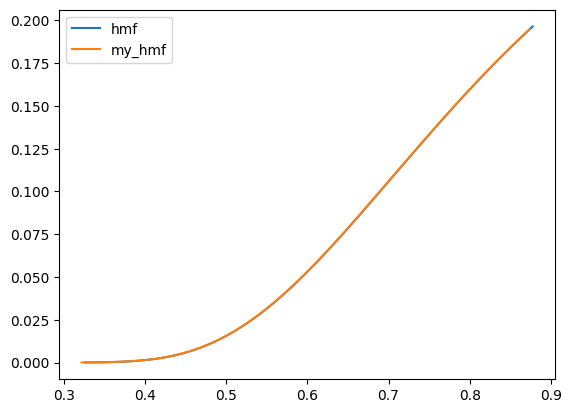

In [20]:
## Test fsigma
plt.plot(mf.sigma, mf.fsigma, label="hmf")
plt.plot(my_mf.sigma, my_mf.fsigma, label="my_hmf")
plt.legend()
plt.show()

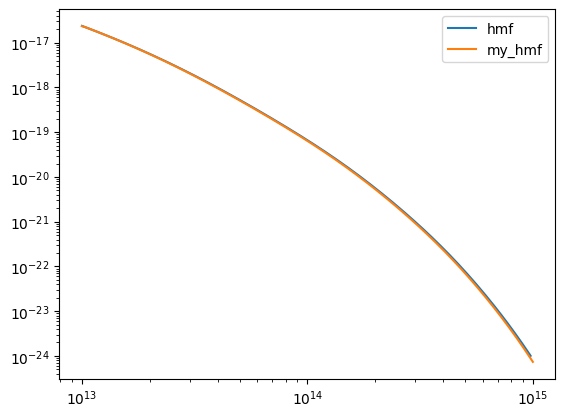

81595768410.27425
81572151878.29759


In [22]:
## Test dndm
plt.xscale("log")
plt.yscale("log")
plt.plot(mf.m, mf.dndm, label="hmf")
plt.plot(my_mf.m, my_mf.dndm, label="my_hmf")
plt.legend()
plt.show()

## Pour le debug
print(mf.mean_density0)
print(my_mf.rho_m_Masse)

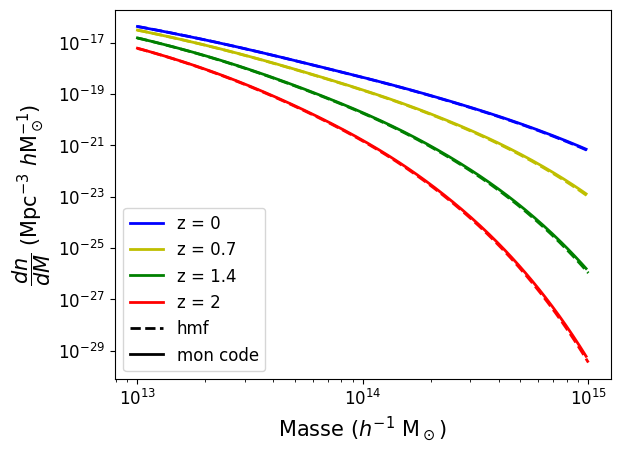

In [24]:
## Overplotting
fig, ax = plt.subplots()
colors = {0: "b", 0.7: "y", 1.4: "g", 2: "r"}
for z in [0, 0.7, 1.4, 2]:
    mf = MassFunction(
    hmf_model="Tinker08",
    transfer_model="CAMB",
    cosmo_params=cosmo_params,
    Mmin=13,
    lnk_min=np.log(1e-4),
    lnk_max=np.log(1),
    z=z,
    )
    my_mf = My_Tinker08(z=z, cosmo_params=cosmo_params)
    plt.plot(my_mf.m, my_mf.dndm, "--", color=colors[z], linewidth=2)
    plt.plot(mf.m, mf.dndm, label=f"z = {z}", color=colors[z], linewidth=2)
plt.plot([], [], label="hmf", color="black", linestyle="--", linewidth=2)
plt.plot([], [], label="mon code", color="black", linewidth=2)
plt.xlabel(r"Masse ($h^{-1}$ M$_\odot$)", size=15)
plt.ylabel(r"$\dfrac{dn}{dM}$ (Mpc$^{-3}$ $h$M$_\odot^{-1}$)", size=15)
plt.xscale("log")
plt.yscale("log")
plt.legend(fontsize=12)
plt.tick_params(axis="both", labelsize=12)
# for tick in ax.xaxis.get_major_ticks():
#     tick.label.set_fontsize(12)
# for tick in ax.yaxis.get_major_ticks():
#     tick.label.set_fontsize(12)
plt.show()
